# <span style="color:blue">ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ С ИСПОЛЬЗОВАНИЕМ БИБЛИОТЕКИ SCIKIT-LEARN</span>

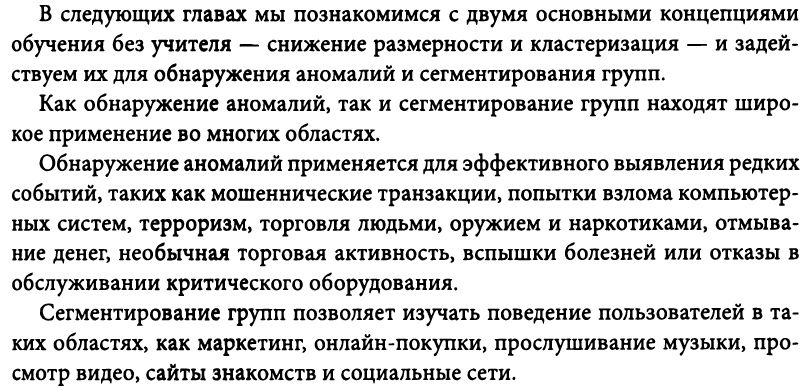

## Снижение размерности

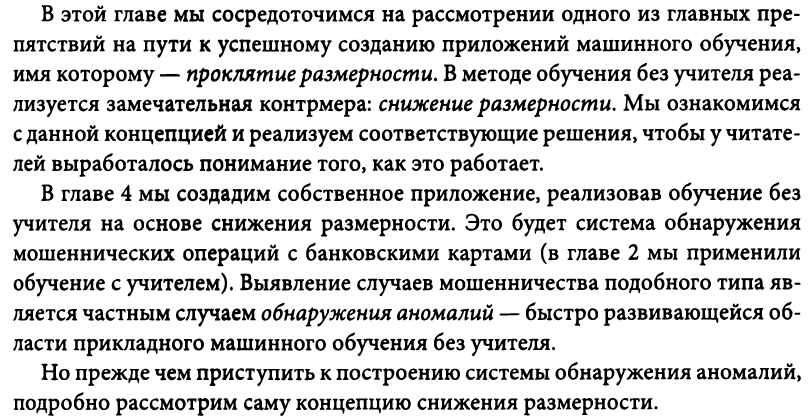

### Причины снижения размерости

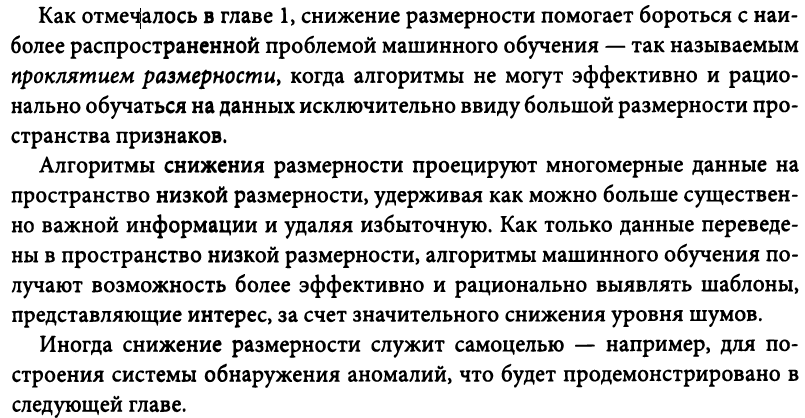

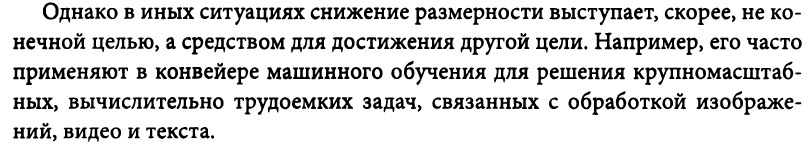

## База данных рукописных цифр MNIST

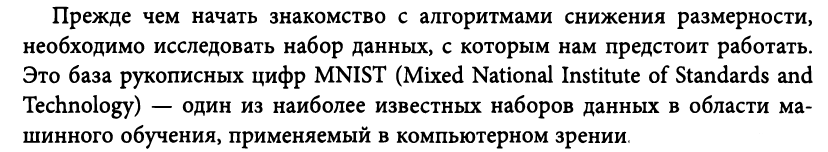

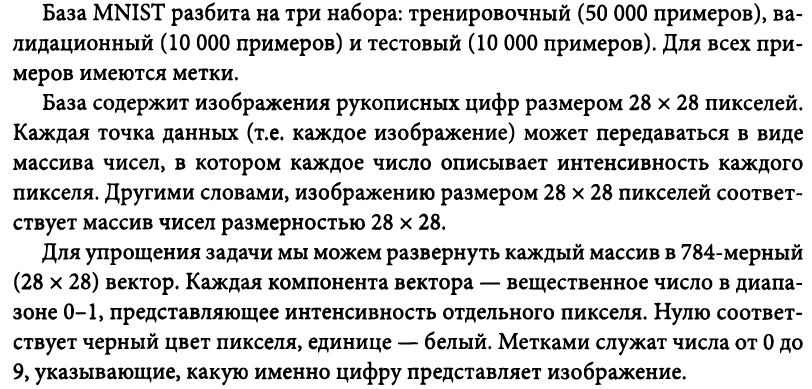

<a href='https://ru.wikipedia.org/wiki/MNIST_(%D0%B1%D0%B0%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)'>MNIST wiki</a>

## Импрот библиотек

In [2]:
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline

#подготовка данных и ценка модели
from sklearn import preprocessing as pp

## Загрузка наборов данных MNIST

In [19]:
current_path = os.getcwd()
file = os.path.sep.join(['', 'handson-unsupervised-learning', 'datasets', 'mnist_data', 'mnist.pkl.gz'])
f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

In [42]:
X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

## Верификация формы наборов данных

In [48]:
#Посмотрим на размеры, сравним формы.
print(f'Форма X_train: {X_train.shape}')
print(f'Форма y_train: {y_train.shape}')
print(f'Форма X_validation: {X_validation.shape}')
print(f'Форма y_validation: {y_validation.shape}')
print(f'Форма X_test: {X_test.shape}')
print(f'Форма y_test: {y_test.shape}')

Форма X_train: (50000, 784)
Форма y_train: (50000,)
Форма X_validation: (10000, 784)
Форма y_validation: (10000,)
Форма X_test: (10000, 784)
Форма y_test: (10000,)


## Создание структур DataFrame библиотеки Pandas на основе наборов данных

In [51]:
#индексация под датафрейы
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train) + len(X_validation))
test_index =  range(len(X_train) + len(X_validation), len(X_train) + len(X_validation) + len(X_test))

#преобразование
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation, index=validation_index)

X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

## Исследование данных

In [61]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


Многие значениы равны нулю, так как большинство пикселей черные (картинки ЧБ)

In [62]:
y_train.head(5)

0    5
1    0
2    4
3    1
4    9
dtype: int64

## Вывод изображений

In [72]:
def view_digit(view_index):
    label = y_train.iloc[view_index]
    image = X_train.iloc[view_index].values.reshape([28, 28])
    plt.title(f'Номер наблюдения: {view_index}. Метка: {label}')
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

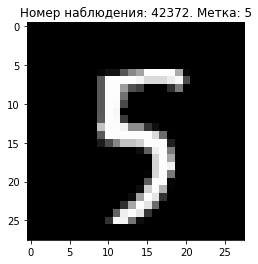

In [75]:
view_digit(42372)

## Алгоритмы снижения размерности

### Линейное проецирование и многократное обучение

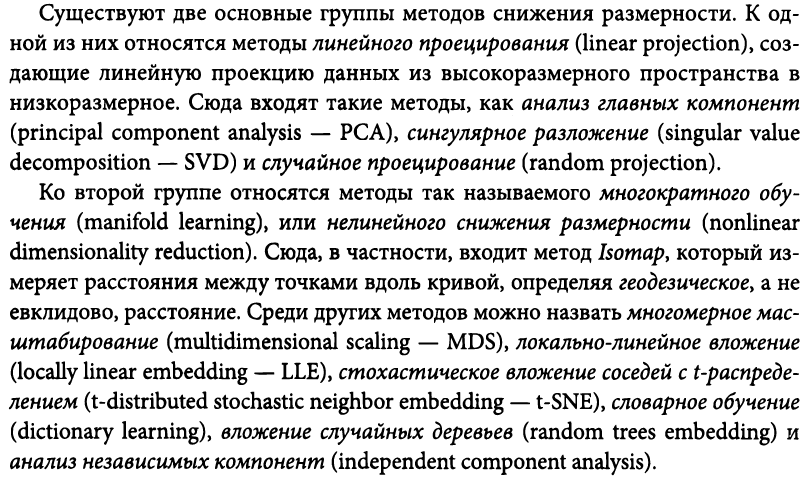

## Анализ главных компонент

### Концепция PCA

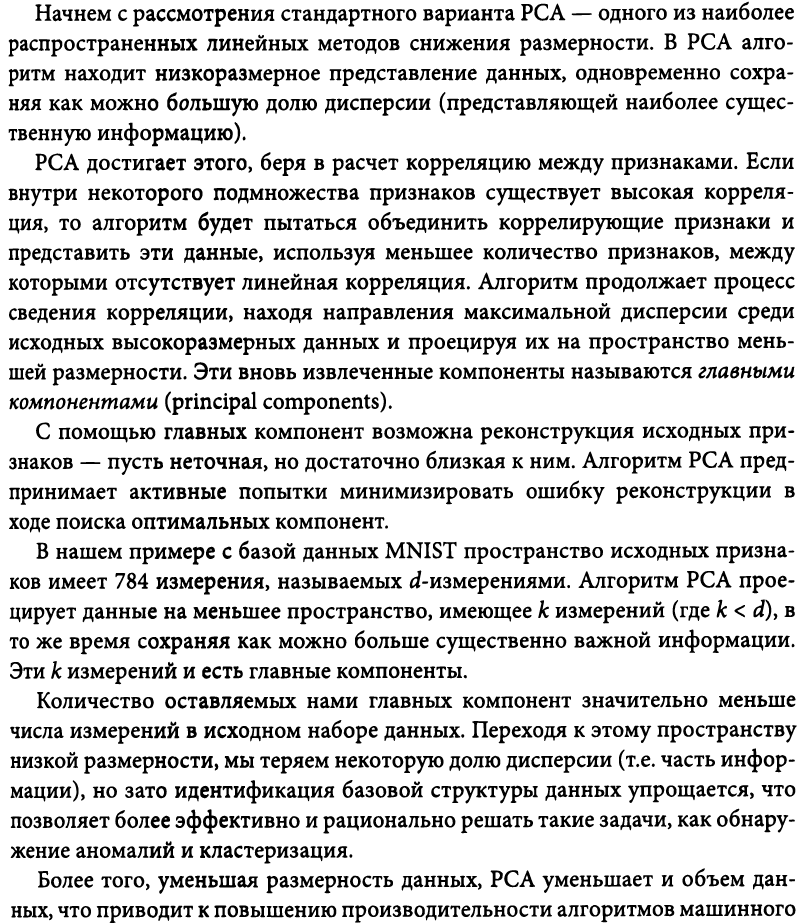

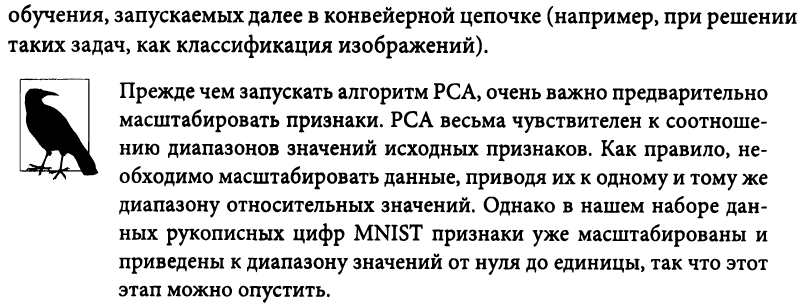

### Реализация PCA

In [1]:
#настройка гиперпараметров

from sklearn.decomposition import PCA

n_components = 784 #исходное кол-во измерений
whiten = False # 
random_state = 10 # воспроизводимость результатов

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)